<a href="https://colab.research.google.com/github/abhishekhkumarsharma/Assignment_Solutions.ipynb/blob/main/DA_AG_017_Clustering_Assignment_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment Code: DA-AG-017**  
**Clustering | Assignment**

**Question 1: What is the difference between K-Means and Hierarchical Clustering?  
Provide a use case for each.**

**Answer:**  

**K-Means Clustering**
- K-Means is a *partition-based* clustering algorithm.
- The number of clusters (**K**) must be specified in advance.
- It works by minimizing the **within-cluster sum of squared distances**.
- It is efficient and scalable for large datasets.

**Use case:**  
Customer segmentation in large e-commerce datasets where the approximate number of customer groups is known beforehand.

**Hierarchical Clustering**
- Hierarchical clustering builds a **tree-like structure (dendrogram)** of clusters.
- It does **not require the number of clusters upfront**.
- Can be **agglomerative** (bottom-up) or **divisive** (top-down).
- Computationally expensive for large datasets.

**Use case:**  
Document or gene clustering where understanding relationships between clusters at different levels is important.


**Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.**

**Answer:**  
The **Silhouette Score** measures how well each data point fits within its assigned cluster compared to other clusters.

- It ranges from **-1 to +1**.
- A value close to **+1** indicates well-separated clusters.
- A value around **0** indicates overlapping clusters.
- A negative value suggests incorrect clustering.

It is used to:
- Compare clustering quality across different algorithms.
- Select the optimal number of clusters.
- Validate cluster cohesion and separation.


**Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?**

**Answer:**  

The core parameters of **DBSCAN** are:

1. **eps (ε):**
   - Defines the radius of the neighborhood around a data point.
   - Larger eps merges more points into clusters.

2. **min_samples:**
   - Minimum number of points required to form a dense region.
   - Higher values make the algorithm stricter.

3. **Metric:**
   - Distance metric used (e.g., Euclidean).

These parameters control cluster density, noise detection, and cluster formation.


**Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?**

**Answer:**  
Feature scaling ensures that all features contribute equally to distance calculations.

- K-Means and DBSCAN rely on **distance-based metrics**.
- Features with larger numeric ranges dominate unscaled data.
- Scaling improves cluster accuracy and stability.

Common techniques:
- StandardScaler
- MinMaxScaler


**Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?**

**Answer:**  
The **Elbow Method** plots the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.

- As K increases, WCSS decreases.
- The optimal K is where the rate of decrease sharply changes (the “elbow”).
- This point balances model simplicity and clustering accuracy.


**Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)**

**Answer:**

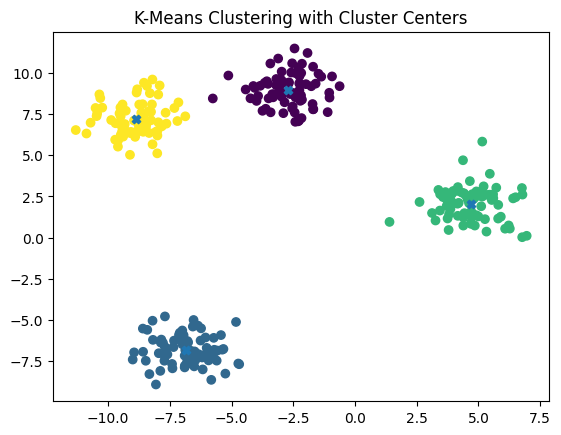

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='X')
plt.title("K-Means Clustering with Cluster Centers")
plt.show()

**Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)**

**Answer:**

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found:", n_clusters)

Number of clusters found: 0


**Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.
(Include your Python code and output in the code box below.)**

**Answer:**

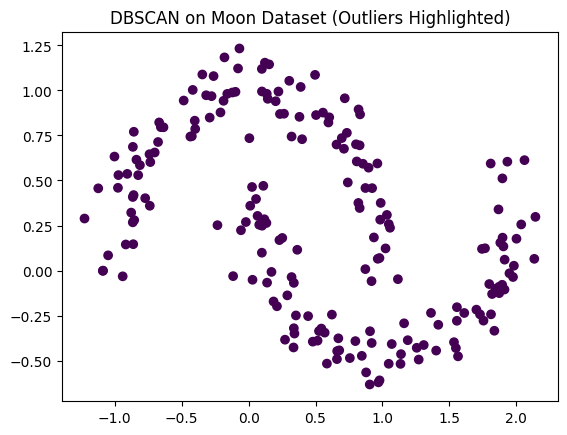

In [3]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels)
plt.title("DBSCAN on Moon Dataset (Outliers Highlighted)")
plt.show()

**Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)**

**Answer:**

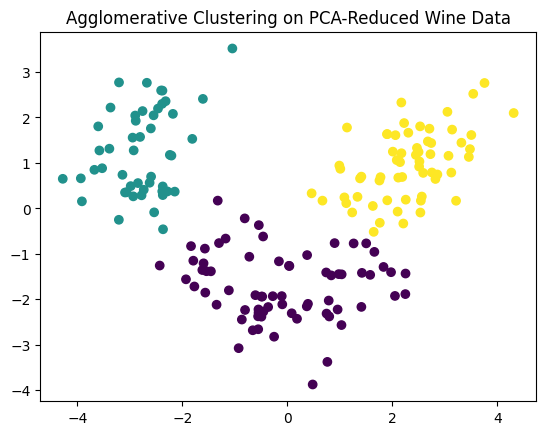

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

X_scaled = StandardScaler().fit_transform(wine.data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title("Agglomerative Clustering on PCA-Reduced Wine Data")
plt.show()

**Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
(Include your Python code and output in the code box below.)**

**Answer:**  

I would use **K-Means** for large datasets and **DBSCAN** to identify outliers.

Preprocessing steps:
- Handle missing values using mean/median imputation.
- Encode categorical variables.
- Apply StandardScaler.

Number of clusters:
- Elbow Method
- Silhouette Score

Benefits:
- Personalized campaigns
- Improved customer retention
- Optimized promotions


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

labels = pipeline.fit_predict(X)
print("Silhouette Score:", silhouette_score(X, labels))

Silhouette Score: 0.3704047501473727
